#SHDOM single-scattering adjoint

This folder conatains the most recent (3 May 2015) single-scattering adjoint calculations from frank.  


>This has the log output files (.log), radiance output files (.arad),
and optical property adjoint files (.adj) for the "true" and "guess"
cases. The first set of output is for the single scattering forward radiance calculations

    >>les0822nh15t13y135_ocaer1_w0.646_ns1true.*,
    
    >>les0822nh15t13y135_ocaer1_w0.646_ns1guess.*,

>and the second set of outputs is for the full multiple scattering forward radiance calculations,

    >>les0822nh15t13y135_ocaer1_w0.646_ns1true2.*,

    >>les0822nh15t13y135_ocaer1_w0.646_ns1guess2.*.


The cloud field used in these simulations is a 2D slice taken at $y_{(i_y=135)}=8.375 \mathrm{km}$ of the 320x320 high resolution simulation shown below. 

![The Reflectance](./les0822nh15t13_aer008_w0.646a_idir01.jpg)

The adjoint calculation is for the gradient of the misfit function, 

\begin{align}
\frac{\partial \Phi(\sigma, \omega)}{\partial(\sigma)} &= \left< \Delta p, \mathcal{U}_{\sigma}[\Delta f] \right>
\end{align}

Only the first order of scattering completed so the results are approximate.  In the calculation labelled "1" the forward and adjoint calculations are only single-scattering.  In the calculation labelled "2", the Forward calculation includes multiple scatterng while the adjoint does not.  


In [1]:
%pylab inline

# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import pandas as pd



Populating the interactive namespace from numpy and matplotlib


In [2]:
# Utility functions

def print_head(fname, Nlines=10, indent="\t"):
    "Print the head of the file."
    
    # Print a message and then the first N lines
    print("Showing head: {}".format(fname))
    for i, line in zip(range(Nlines), open(fname, 'r')):
        print(indent + line.strip())
        
    print('\n')
    
def read_log(flog, start_line="X      Z   Extinct", max_lines=10**8):
    """
    Read in a log file but save lines only after reaching a line 
    matching start_line.
    """
    
    # Loop over lines record after header and before footer
    ncols = None 
    lines = []
    for i, line in zip(range(max_lines), open(flog, 'r')):
        new = line.strip().split()
        
        # Check if the line is the header
        if ncols is None:
            if line.strip()[:len(start_line)]==start_line:
                ncols = len(new[:9])
                cols = new[:9]
        else:        
            if ncols == len(new[:9]):
                lines.append(new[:9])
            else:
                print(new)
                break
    # Raise an error if the file had no line with the specified columns    
    if ncols is None: 
        raise ValueError("No column line found containing {}".format(start_line))
        
    # Make dictionary of arrays from keys array with given lines
    N = len(lines) - 1
    value_array = np.array(lines[:], dtype='f8')
    
    log_dict = dict(zip(cols, list(value_array.T)))
    return log_dict
    

In [3]:
ls

exploring_adjoint.ipynb
les0822nh15t13_aer008_w0.646a_idir01.jpg
les0822nh15t13y135_ocaer1_w0.646_ns1guess2.adj
les0822nh15t13y135_ocaer1_w0.646_ns1guess2.arad
les0822nh15t13y135_ocaer1_w0.646_ns1guess2.log
les0822nh15t13y135_ocaer1_w0.646_ns1guess.adj
les0822nh15t13y135_ocaer1_w0.646_ns1guess.arad
les0822nh15t13y135_ocaer1_w0.646_ns1guess.log
les0822nh15t13y135_ocaer1_w0.646_ns1true2.adj
les0822nh15t13y135_ocaer1_w0.646_ns1true2.arad
les0822nh15t13y135_ocaer1_w0.646_ns1true2.log
les0822nh15t13y135_ocaer1_w0.646_ns1true.adj
les0822nh15t13y135_ocaer1_w0.646_ns1true.arad
les0822nh15t13y135_ocaer1_w0.646_ns1true.log


# Looking at the data files

In [7]:
# The log file
flog = "les0822nh15t13y135_ocaer1_w0.646_ns1true2.log"
print_head(flog, Nlines=10)

# The radiance file
frad = "les0822nh15t13y135_ocaer1_w0.646_ns1true2.arad"
print_head(frad, Nlines=25)

# The adjoint file
fadj = "les0822nh15t13y135_ocaer1_w0.646_ns1true2.adj"
GUESS = True
if GUESS == True:
    fadj = "les0822nh15t13y135_ocaer1_w0.646_ns1guess2.adj"

print_head(fadj, Nlines=500)

Showing head: les0822nh15t13y135_ocaer1_w0.646_ns1true2.log
	
	Name of this SHDOMADJ run:
	les0822nh15t13y135_ocaer1_w0.646_ns1true2
	Input particle properties filename (or NONE for Rayleigh only)
	les0822nh15t13y135_ocaer1t.part
	Number of input scattering tables
	2
	Name of each scattering table
	water_w0.646.scat
	aero_oc_w0.646.scat


Showing head: les0822nh15t13y135_ocaer1_w0.646_ns1true2.arad
	! Polarized Spherical Harmonic Discrete Ordinate Radiative Transfer Radiance Output
	!  L= 15  M= 15  NLM=  256   NMU= 16  NPHI= 32  NANG=  354   NSH=   3059599
	!  NSTOKES=1   NX= 320   NY=   1   NZ=  86    NPTS=   36912   NCELLS=   42822
	!  PARTICLE_FILE=les0822nh15t13y135_ocaer1t.part
	!  CORRELATED_K-DIST_FILE=NONE   NUM_G= 1
	!  SOURCE_TYPE=SOLAR               DELTA-M METHOD
	!  GRID_TYPE=EVEN (X,Y)    PROPERTY-FILE (Z)    INDEPENDENT_PIXEL=2
	!  SURFACE_TYPE=FIXED LAMBERTIAN         HORIZ_BOUNDARY_COND=0
	!  GROUND_ALBEDO=0.0500000  SKY_RAD= 0.00000E+00
	!  SOLAR_FLUX= 0.100000E+01  

In [8]:
pd.read_csv?

In [9]:
# Load the adjoint file into memory
adj_frame = pd.read_csv(fadj, quoting=3, delim_whitespace=True, skiprows=2)
 
# Get variables from the array
nx = adj_frame['X'].unique().size
nz = adj_frame["Z"].unique().size

adj_x = np.array(adj_frame["X"], dtype='f8').reshape(nx, nz)
adj_z = np.array(adj_frame["Z"], dtype='f8').reshape(nx, nz)
adj_ext = np.array(adj_frame["Extinct"], dtype='f8').reshape(nx, nz)
adj_alb = np.array(adj_frame["SSalbedo"], dtype='f8').reshape(nx, nz)
adj_dMFdext = np.array(adj_frame["dMF/dExt"], dtype='f8').reshape(nx, nz)
adj_dMFdalb = np.array(adj_frame["dMF/dSSalb"], dtype='f8').reshape(nx, nz)



<matplotlib.colorbar.Colorbar instance at 0x582f950>

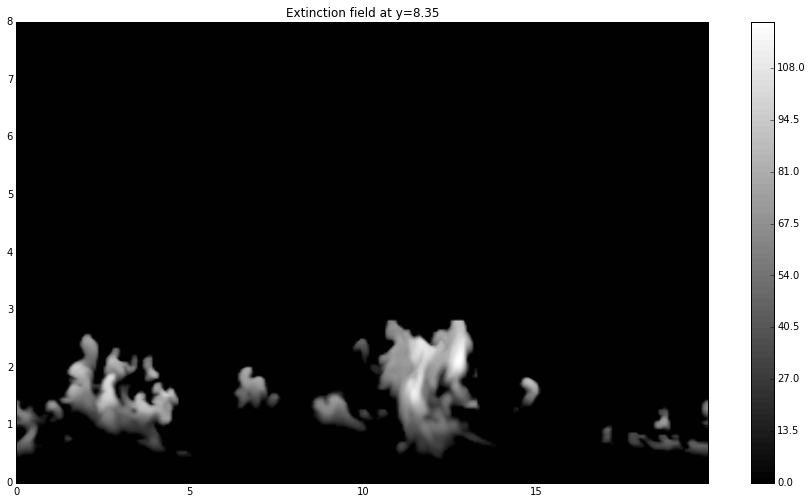

In [10]:
# Make a figure to plot the true extinction field
f0 = plt.figure(0, (15,8), facecolor='white')
ax0 = f0.add_axes([.1, .1, .8, .8])
contour0 = ax0.contourf(adj_x, adj_z, adj_ext, 100, cmap=cm.gray)
ax0.set_ybound((0,8))
if GUESS==True:
    ax0.set_title("Extinction field at y=8.35")
else:
    ax0.set_title("Extinction field at y=8.35")
f0.colorbar(contour0, ax=ax0)

<matplotlib.colorbar.Colorbar instance at 0x17a059e0>

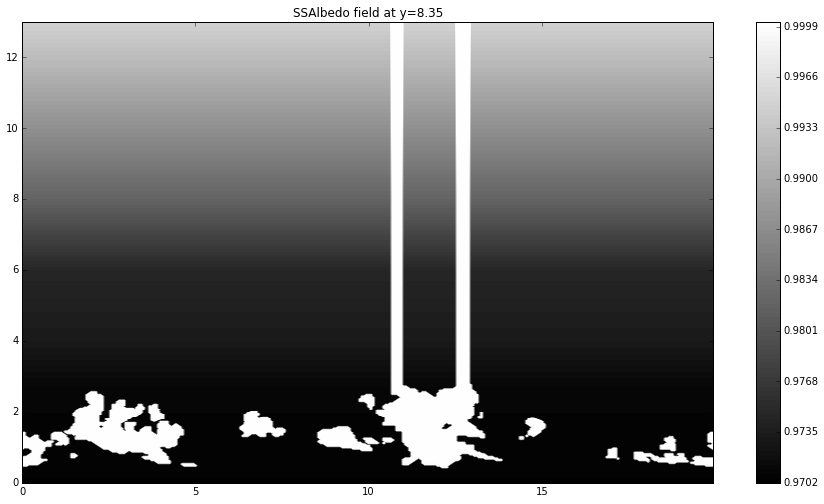

In [33]:
# Make a figure to plot the true single-scattering albedo field
f1 = plt.figure(1, (15,8), facecolor='white')
ax1 = f1.add_axes([.1, .1, .8, .8])
contour1 = ax1.contourf(adj_x, adj_z, adj_alb, 100, cmap=cm.gray)
ax1.set_ybound((0,13))
ax1.set_title("SSAlbedo field at y=8.35")
f1.colorbar(contour1, ax=ax1)


<matplotlib.colorbar.Colorbar instance at 0x1a11c8c0>

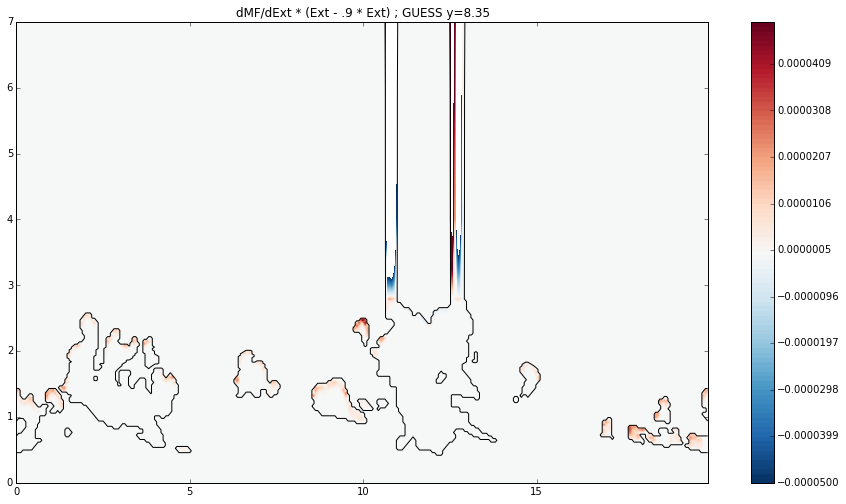

In [37]:
# Make a figure to plot the true single-scattering albedo field
f2 = plt.figure(1, (15,8), facecolor='white')
ax2 = f2.add_axes([.1, .1, .8, .8])

contour2 = ax2.contourf(adj_x, adj_z, adj_dMFdext*(.1*adj_ext) * (adj_alb>=0.9999), levels=np.linspace(-.00005, 0.00005, 100), cmap=cm.RdBu_r) #levels=linspace(-16, 16, 100),
contour2a = ax2.contour(adj_x, adj_z, adj_alb, 1, cmap=cm.gray) #levels=linspace(-16, 16, 100),


ax2.set_ybound((0,7))

if GUESS==True:
    ax2.set_title("dMF/dExt * (Ext - .9 * Ext) ; GUESS y=8.35")
else:
    ax2.set_title("dMF/dExt field at y=8.35")
f2.colorbar(contour2, ax=ax2)


<matplotlib.colorbar.Colorbar instance at 0x1654ffc8>

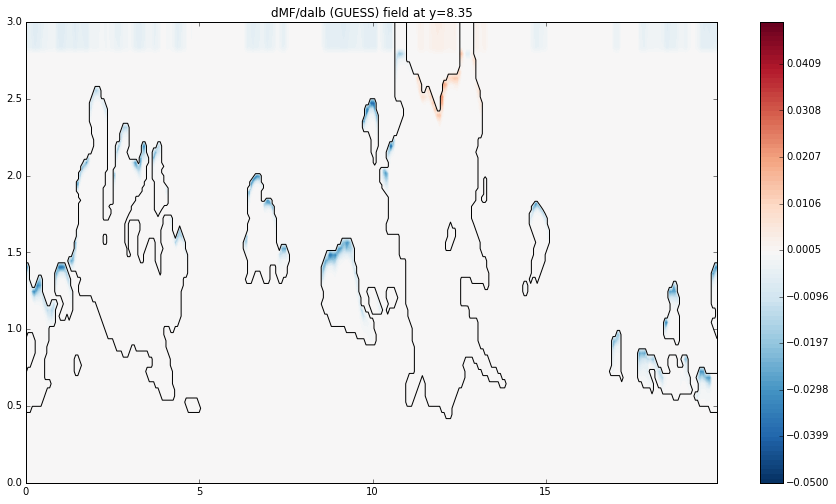

In [32]:
# Make a figure to plot the true single-scattering albedo field
f3 = plt.figure(1, (15,8), facecolor='white')
ax3 = f3.add_axes([.1, .1, .8, .8])
contour3 = ax3.contourf(adj_x, adj_z, adj_dMFdalb, levels=linspace(-.05, .05,100), cmap=cm.RdBu_r)

contour3a = ax3.contour(adj_x, adj_z, adj_alb, 1, cmap=cm.gray) #levels=linspace(-16, 16, 100),

ax3.set_ybound((0,3))
if GUESS == True:
    ax3.set_title("dMF/dalb (GUESS) field at y=8.35")
else:
    ax3.set_title("dMF/dalb field at y=8.35")
f3.colorbar(contour3, ax=ax3)

In [18]:
# The the adjoint results
fadj = "radobs_les0822nh15t13y89_ocaer1_w0.646_ns1ss1.adj"
print_head(fadj, Nlines=100)  



Showing head: radobs_les0822nh15t13y89_ocaer1_w0.646_ns1ss1.adj
	! SHDOMADJ optical property adjoint output
	!   X       Y       Z     ADEXTINCT   ADALBEDO   ADSINGSCAT(1..NSTSING,1..NRADDIR)
	0.0000  0.0000  0.0000 -7.220E-06  1.384E-06  2.540E-05  2.610E-05  8.162E-06
	0.0000  0.0000  0.0095 -2.529E-05  4.514E-06  8.070E-05  8.761E-05  2.636E-05
	0.0000  0.0000  0.0315 -4.138E-05  6.660E-06  1.110E-04  1.388E-04  3.794E-05
	0.0000  0.0000  0.0574 -5.251E-05  7.601E-06  1.131E-04  1.745E-04  4.170E-05
	0.0000  0.0000  0.0878 -7.434E-05  1.058E-05  1.803E-04  2.251E-04  4.762E-05
	0.0000  0.0000  0.1245 -9.725E-05  1.517E-05  3.012E-04  2.890E-04  5.036E-05
	0.0000  0.0000  0.1650 -1.076E-04  2.087E-05  4.663E-04  3.559E-04  4.724E-05
	0.0000  0.0000  0.2050 -1.844E-04  3.026E-05  7.619E-04  4.354E-04  4.552E-05
	0.0000  0.0000  0.2450 -2.578E-04  4.331E-05  1.200E-03  5.195E-04  3.654E-05
	0.0000  0.0000  0.2850 -2.246E-04  5.936E-05  1.716E-03  6.427E-04  3.027E-05
	0.0000  0.0000  0

In [9]:
# Read the adjoint file

cols = ['X', 'Y', 'Z', 'ADEXTINCT', "ADALBEDO"]
value_list = []
for line in open(fadj):
    if line[0] =='!':
        pass
    else:
        new = line.strip().split()
        value_list.append(new[:len(cols)])
        
values = np.array(value_list, dtype="f8").T
adjoint_dict = dict(zip(cols, values))


In [10]:
# Get values to plot
nx = np.unique(adjoint_dict['X']).size
nz = np.unique(adjoint_dict['Z']).size
x = adjoint_dict['X'].reshape(nx, nz)
z = adjoint_dict['Z'].reshape(nx, nz)
adj_ext = adjoint_dict['ADEXTINCT'].reshape(nx, nz)
adj_alb = adjoint_dict['ADALBEDO'].reshape(nx, nz)

print("maxes: {}, {}.".format(abs(adj_ext).max(),abs(adj_alb).max()))


maxes: 16.91, 0.501.


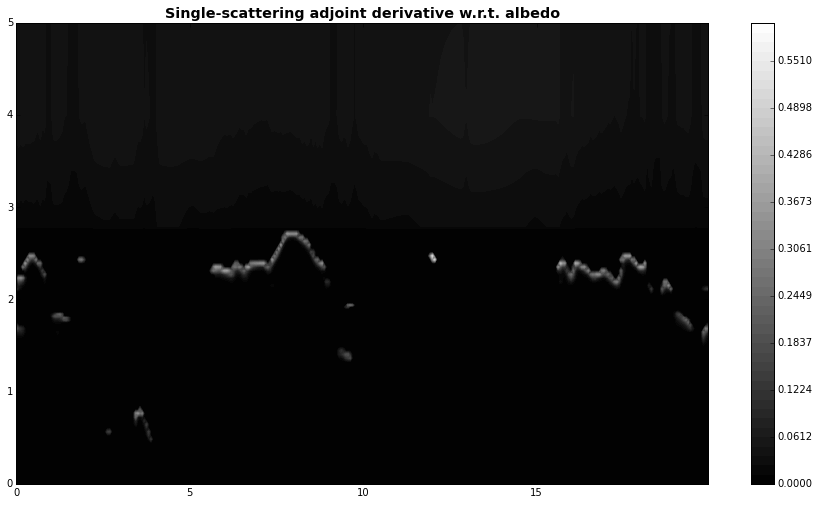

In [11]:
#plot the adjoint of the extinction
f1 = plt.figure(1, (15, 8), facecolor='white')
ax1 = f1.add_axes([.1, .1, .8, .8])
contour1 =ax1.contourf(x, z, adj_alb, levels=np.linspace(0, .6,50), cmap=cm.gray)
ax1.set_ybound(0,5)
f1.colorbar(contour1, ax=ax1)

ax1.set_title("Single-scattering adjoint derivative w.r.t. albedo", fontsize="x-large", fontweight="bold")

In [19]:
# The first adjoint radiance field
farad1 = "radobs_les0822nh15t13y89_ocaer1_w0.646_ns1ss1.arad"
print_head(farad1, Nlines=100)


Showing head: radobs_les0822nh15t13y89_ocaer1_w0.646_ns1ss1.arad
	! Polarized Spherical Harmonic Discrete Ordinate Radiative Transfer Radiance Output
	!  L= 15  M= 15  NLM=  256   NMU= 16  NPHI= 32  NANG=  354   NSH=   1757885
	!  NSTOKES=1   NX= 320   NY=   1   NZ=  85    NPTS=   27285   NCELLS=   26880
	!  PARTICLE_FILE=les0822nh15t13y89_ocaer1.part
	!  CORRELATED_K-DIST_FILE=NONE   NUM_G= 1
	!  SOURCE_TYPE=SOLAR               DELTA-M METHOD
	!  GRID_TYPE=EVEN (X,Y)    PROPERTY-FILE (Z)    INDEPENDENT_PIXEL=2
	!  SURFACE_TYPE=FIXED LAMBERTIAN         HORIZ_BOUNDARY_COND=0
	!  GROUND_ALBEDO=0.0500000  SKY_RAD= 0.00000E+00
	!  SOLAR_FLUX= 0.100000E+01   SOLAR_MU=-0.9221000   SOLAR_AZ= 339.400
	!  UNITS=WATTS/(M^2 MICRON STER)    WAVELENGTH=      0.65
	!  SPLITTING_ACCURACY= 0.300E-01   SPHERICAL_HARMONIC_ACCURACY= 0.300E-02
	!  SOLUTION_ACCURACY= 0.300E-04
	!  MAXIMUM_ITERATIONS=   0   NUMBER_ITERATIONS=   0
	!  RADIANCE AT Z= 15.000
	320    1    3 ! NXOUT, NYOUT, NRADDIR
	!  ID      m

In [13]:
# The second adjoint radiance field
farad2 = "radobs_les0822nh15t13y89_ocaer1_w0.646_ns1ss2.arad"
print_head(farad2)                


Showing head: radobs_les0822nh15t13y89_ocaer1_w0.646_ns1ss2.arad
	! Polarized Spherical Harmonic Discrete Ordinate Radiative Transfer Radiance Output
	!  L= 15  M= 15  NLM=  256   NMU= 16  NPHI= 32  NANG=  354   NSH=   2422485
	!  NSTOKES=1   NX= 320   NY=   1   NZ=  85    NPTS=   30052   NCELLS=   31290
	!  PARTICLE_FILE=les0822nh15t13y89_ocaer1.part
	!  CORRELATED_K-DIST_FILE=NONE   NUM_G= 1
	!  SOURCE_TYPE=SOLAR               DELTA-M METHOD
	!  GRID_TYPE=EVEN (X,Y)    PROPERTY-FILE (Z)    INDEPENDENT_PIXEL=2
	!  SURFACE_TYPE=FIXED LAMBERTIAN         HORIZ_BOUNDARY_COND=0
	!  GROUND_ALBEDO=0.0500000  SKY_RAD= 0.00000E+00
	!  SOLAR_FLUX= 0.100000E+01   SOLAR_MU=-0.9221000   SOLAR_AZ= 339.400




In [14]:
# A sample modis file
fmodis_blue = "les0822nh15t13_aer008_w0.646rad.modis"
print_head(fmodis_blue)

Showing head: les0822nh15t13_aer008_w0.646rad.modis
	40  40  23
	! Simulated MODIS reflectances from SHDOM radiance output
	! IA   Rad(1:Ncross)
	1 1.0000  0.00   0.00 20.000 20.000 ! idir, mu, theta, phi_shdom, size_cross, size_along
	1 0.0765 0.1141 0.2162 0.1455 0.1407 0.0961 0.0401 0.0496 0.0690 0.0696 0.0722 0.0709 0.0778 0.0677 0.0694 0.0692 0.0725 0.1055 0.0934 0.0724 0.0701 0.0680 0.0680 0.0679 0.0680 0.0682 0.0684 0.0691 0.0747 0.0888 0.1230 0.0937 0.1201 0.0896 0.0944 0.0857 0.0592 0.0672 0.0700 0.0722
	2 0.0702 0.0723 0.0972 0.0969 0.2869 0.2755 0.0567 0.0559 0.0687 0.0636 0.0761 0.0977 0.0996 0.1314 0.0961 0.0598 0.0686 0.0689 0.0840 0.0941 0.0648 0.0692 0.0710 0.0670 0.0679 0.0678 0.0682 0.0687 0.0697 0.0782 0.1025 0.0723 0.0575 0.0718 0.0841 0.0720 0.0803 0.0733 0.0694 0.0699
	3 0.0697 0.0700 0.0712 0.0723 0.1212 0.1625 0.0773 0.0977 0.0573 0.0622 0.0979 0.0866 0.1896 0.2539 0.1146 0.1198 0.1418 0.0673 0.0754 0.1100 0.0931 0.0671 0.0703 0.0683 0.0682 0.0679 0.0679 0.0683 

In [15]:
# Reflectance from the MODIS case, but at full 320 x 320 resolution 
fhres_blue = "les0822nh15t13_aer008_w0.646.ref"
print_head(fhres_blue)

Showing head: les0822nh15t13_aer008_w0.646.ref
	0   0 0.0499 0.1004 0.2231 0.0945 0.0426 0.1586 0.0464
	1   0 0.0495 0.1004 0.2272 0.0976 0.0393 0.2537 0.0463
	2   0 0.0493 0.1004 0.2193 0.0935 0.0390 0.2863 0.0463
	3   0 0.0493 0.1004 0.2151 0.0913 0.0391 0.2772 0.0463
	4   0 0.0498 0.1004 0.2003 0.0937 0.0394 0.2357 0.0462
	5   0 0.0533 0.1003 0.1858 0.0979 0.0399 0.1731 0.0462
	6   0 0.0583 0.1003 0.1592 0.1063 0.0407 0.1175 0.0461
	7   0 0.0602 0.1002 0.1362 0.1148 0.0413 0.0771 0.0460
	8   0 0.0602 0.1002 0.1257 0.1197 0.0413 0.0479 0.0459
	9   0 0.0602 0.1001 0.1255 0.1194 0.0413 0.0425 0.0459


